In [1]:
import numpy as np
import pandas as pd


In [2]:
# loding traing and test data
train_data=pd.read_csv(r'C:\Users\Dell\Desktop\Supervised Learning - Linear Regression w\Linear Regression\SVM\risk_analytics_train.csv',index_col=0,header=0)
test_data=pd.read_csv(r'C:\Users\Dell\Desktop\Supervised Learning - Linear Regression w\Linear Regression\SVM\risk_analytics_test.csv',index_col=0,header=0)

In [3]:
print(train_data.shape)
train_data.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(test_data.shape)
test_data.head()

(367, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(train_data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
print(test_data.isnull().sum())

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
# imputing categrical missing values data with mode value

colname1=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]
for X in colname1:
    train_data[X].fillna(train_data[X].mode()[0],inplace=True)
    test_data[X].fillna(test_data[X].mode()[0],inplace=True)

In [8]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
train_data.Credit_History.mode()

0    1.0
dtype: float64

In [10]:
# imputing nurical missing data with mean values
train_data['LoanAmount'].fillna(round(train_data[X].mean(),0),inplace=True)
test_data['LoanAmount'].fillna(round(test_data[X].mean(),0),inplace=True)
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [11]:
#imputitng values for credit_history column differently
train_data['Credit_History'].fillna(value=0,inplace=True)
test_data['Credit_History'].fillna(value=0,inplace=True)
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [12]:
# transforming caategerical data to nurmicale
from sklearn.preprocessing import LabelEncoder
colname=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
le=LabelEncoder()
for X in colname:
    train_data[X]=le.fit_transform(train_data[X])

In [13]:
# transforming caategerical data to nurmicale
from sklearn.preprocessing import LabelEncoder
colname=["Gender","Married","Education","Self_Employed","Property_Area"]
le=LabelEncoder()
for X in colname:
    test_data[X]=le.fit_transform(test_data[X])

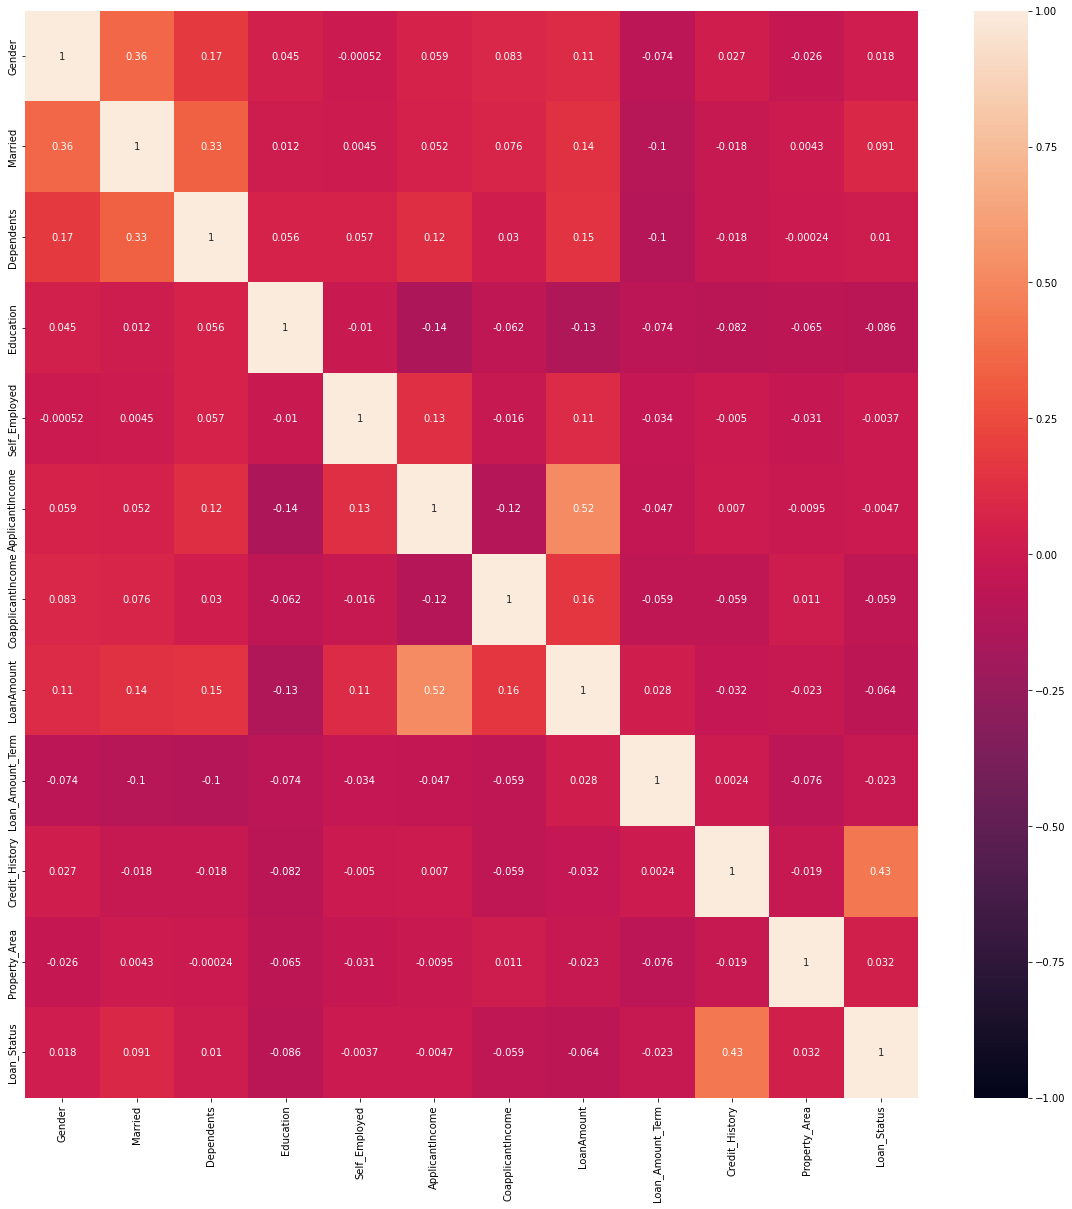

In [14]:
corr_df=train_data.corr()
#print(corr_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

# Creating training and testing dataset and running the model

In [15]:
X_train=train_data.values[:,0:-1]
Y_train=train_data.values[:,-1]
Y_train=Y_train.astype(int)

In [16]:
X_train.shape

(614, 11)

In [17]:
#test_data.head()
X_test=test_data.values[:,:]

In [18]:
X_test.shape

(367, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train)
X_train =scaler.transform(X_train)

X_test =scaler.transform(X_test)

In [1]:
print(X_train)

NameError: name 'X_train' is not defined

In [55]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [22]:
svc_model.score(X_train,Y_train)

# score-->
#Y_pred=svc_model.predict(X_train)
# accuracy_score(Y_train,Y_pred)

0.7980456026058632

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=svc_model.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[105  87]
 [ 37 385]]
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       192
           1       0.82      0.91      0.86       422

    accuracy                           0.80       614
   macro avg       0.78      0.73      0.75       614
weighted avg       0.79      0.80      0.79       614



In [24]:
test_data=pd.read_csv(r'C:\Users\Dell\Desktop\Supervised Learning - Linear Regression w\Linear Regression\SVM\risk_analytics_test.csv',header=0)
test_data["Y_predictions"]=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [25]:
test_data["Y_predictions"]=test_data["Y_predictions"].map({1:"Eligible",0:"NotEligible"})

In [26]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,NotEligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


In [27]:
test_data.to_excel(r'C:\Users\Dell\Desktop\Supervised Learning - Linear Regression w\Linear Regression\SVM\test_data_output.xlsx',index=False)

In [28]:
test_data.Y_predictions.value_counts()

Eligible       285
NotEligible     82
Name: Y_predictions, dtype: int64

In [41]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) #75.89%
classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') #75.07%
#classifier=svm.SVC(kernel='sigmoid',C=10,gamma=0.01) #77.03%
#classifier=svm.SVC(kernel='rbf',C=20.0,gamma=0.001) #77.03%
#classifier=LogisticRegression() #77.20%

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
                                                 
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.75806452 0.80645161 0.74193548 0.69354839 0.72131148 0.63934426
 0.7704918  0.7704918  0.7704918  0.7704918 ]
0.7442622950819672


In [44]:
from sklearn import svm

svc_model = svm.SVC(kernel="rbf")

parameter_space = {
   'kernel': ["linear","rbf","poly","sigmoid"],
    'gamma': [0.1,0.01,0.001],
    'C': [1,5,8,10,20]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)


In [45]:
clf.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}


In [47]:
#!pip install pickle

In [48]:
import pickle

In [56]:
# save the model to disk
filename='svc_model.sav'
pickle.dump(svc_model,open(filename,'wb'))

In [57]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred=loaded_model.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,